<a href="https://colab.research.google.com/github/EddieOrmseth/MAT-421/blob/main/Module%20C/ModuleC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root Finding Problem: The root finding problem is an incredible important problem in mathematics. The basic interpretation of this problem is to find the places where a given function crosses the x axis, or to determine which inputs will create an output of 0.

Zero has specific properties that make it a good choice to try and solve this problem. Framing it as a search for zero also makes it easier to solve problems where to expressions are set equal to each other: e1 = e2. When is this true? Well, find the places where e1 - e2 = 0, which is the Root Finding Problem again.

Many mathematicians have contributed to the algorithms that solve this problem, however most of them do not deal in exact or analytical solutions. The RFP is solved using algorithms that are designed to get iteratively closer the solution, not to analyze the given equation and come to an exact answer.

Tolerance: tolerance is the amount of error that we allow. The majority of the algorithms that exist to solve the RFP do not find the exact solution. The exact solution may also be irrational, and it may not be possible to determine it exactly without analytical solutions, which in turn may not exist. However, we still need a solution to the problem, so we allow there to be a small amount of tolerance in the result. As long as the reult is within a small tolerance of zero we will count it. This tolerance may change depending on the situation, and is often very negligible.

Bisection Method: The bisection method is a method for solving the Root Finding Problem. It is quite reliable, however it does require some information to work. This method requires two numbers, a & b, such that f(a) * f(b) < 0.

This requirement means that f(a) and f(b) must be on different sides of the x-axis, and so long as f is continuous, there must be some point on the x-axis between a and b. This comes from the intermediate value theorem.

The bisection model works in a fairly simply way:
Bisect(f, a, b, tolderance)
  1. let c = (a + b) / 2
  2. if (abs(f(c)) < tolerance) then c is the root.
  3. choose d from {a, b} such that f(d) * f(c) < 0, call Bisect(f, c, d)

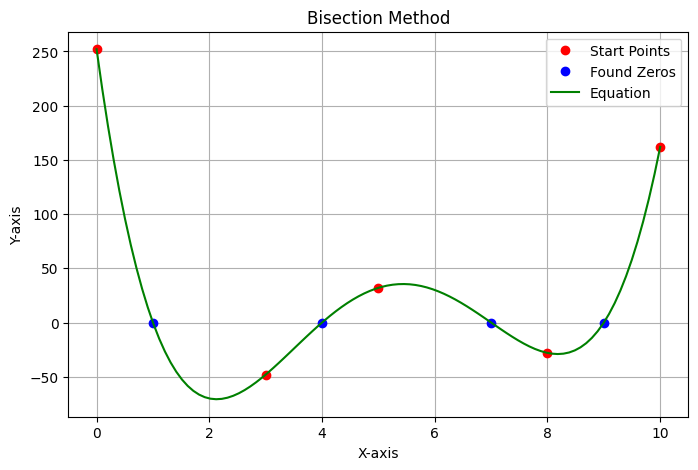

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.interpolate import KroghInterpolator


def Bisect(f, a, b, tolerance = .001) -> float:
    c = 0
    fc = tolerance + 1
    while abs(fc) > tolerance:
        c = (a + b) / 2
        fc = f(c)

        if (fc * f(a)) < 0: b = c # replace b
        else: a = c # replace a

    return c


f = lambda x: (x-1)*(x-4)*(x-7)*(x-9)

# initial point around intervals, get y values
x_start_pts = [0, 3, 5, 8, 10]
y_start_pts = []
for i in range(0, len(x_start_pts)):
    y_start_pts.append(f(x_start_pts[i]))

# find the zeros between the intervals
x_found_pts = []
y_found_pts = []
for i in range(0, len(x_start_pts) - 1):
    x = Bisect(f, x_start_pts[i], x_start_pts[i + 1])
    x_found_pts.append(x)
    y_found_pts.append(f(x))

# compute so we can show equation
resolution = 100
x_full = np.linspace(0, 10, resolution)
y_full = []
for i in range(0, len(x_full)):
    y_full.append(f(x_full[i]))

# display everything
plot.figure(figsize=(8, 5))
plot.plot(x_start_pts, y_start_pts, marker='o', linestyle='None', color='r', label='Start Points')
plot.plot(x_found_pts, y_found_pts, marker='o', linestyle='None', color='b', label='Found Zeros')
plot.plot(x_full, y_full, marker='None', linestyle='-', color='g', label='Equation')
plot.title("Bisection Method")
plot.xlabel("X-axis")
plot.ylabel("Y-axis")
plot.legend()
plot.grid()
plot.show()

Newton Raphson Method: The Newton-Raphson method is another method of solving the Root Finding Problem. This one converges faster than the Bisection method, but requires a good initial guess to work properly.

It works differnetly. Using the adjustment -f(x) / f'(x), this method looks at the slope of the equation at the current point, towards the x-axis. The size of the step is scaled by the curent distance from the x-axis, or f(x).

For each step:
x_(n+1) = x_n - (f(x_n) / f'(x_n))

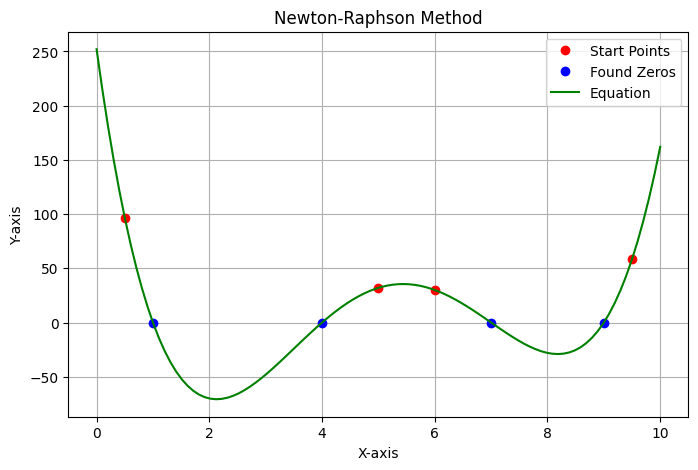

In [3]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.interpolate import KroghInterpolator


def NewtonRaphson(f, f_prime, x, tolerance = .01) -> float:
    while (abs(f(x)) > tolerance):
        x = x - (f(x) / f_prime(x))
    return x


f = lambda x: (x-1)*(x-4)*(x-7)*(x-9)
f_prime = lambda x: (f(x + .001) - f(x - .001)) / (.002)

# initial point around intervals, get y values
x_start_pts = [.5, 5, 6, 9.5]
y_start_pts = []
for i in range(0, len(x_start_pts)):
    y_start_pts.append(f(x_start_pts[i]))

# find the zeros between the intervals
x_found_pts = []
y_found_pts = []
for i in range(0, len(x_start_pts)):
    x = NewtonRaphson(f, f_prime, x_start_pts[i])
    x_found_pts.append(x)
    y_found_pts.append(f(x))

# compute so we can show equation
resolution = 100
x_full = np.linspace(0, 10, resolution)
y_full = []
for i in range(0, len(x_full)):
    y_full.append(f(x_full[i]))

# display everything
plot.figure(figsize=(8, 5))
plot.plot(x_start_pts, y_start_pts, marker='o', linestyle='None', color='r', label='Start Points')
plot.plot(x_found_pts, y_found_pts, marker='o', linestyle='None', color='b', label='Found Zeros')
plot.plot(x_full, y_full, marker='None', linestyle='-', color='g', label='Equation')
plot.title("Newton-Raphson Method")
plot.xlabel("X-axis")
plot.ylabel("Y-axis")
plot.legend()
plot.grid()
plot.show()